## 4.2.5 欠損値処理

### `欠損値処理関数一覧`

|No.|関数名|説明|戻り値|備考|
|----|-------|-----|--------|-----|
|1|df.isnull()|欠損値かどうかを確認|Boolean型|pandasの関数|
|2|df.dropna()|欠損値を削除|なし|pandasの関数|
|3|df.fillna(0)|欠損値を0で補完|小数|pandasの関数|
|4|df.fillna(df.method='ffill'))|最頻値を１つ前の値で補完|小数|pandasの関数|
|5|df.fillna(df.mean())|欠損値を平均値で補完|小数|pandasの関数|
|6|df.fillna(df.median())|欠損値を平中央値で補完|小数|pandasの関数|
|7|df.fillna(df.mode().iloc[0,:])|最頻値を平中央値で補完|小数|pandasの関数|
|8|imp=Imputer(strategy,axis=0)<br>imp.fit(df)<br> imp.transform(df))|strategyにmean median, <br>most_frequentなどを設定<br>axis:0列、1行|小数|sklearn.preprocessing <br>モジュールImputerクラスの関数|

### `データ連結`　　　　 <span style="color: blue; ">pd.concat([df1,df2],axis =0) axis=1列、axis=0行</span>

### `基本統計量`

|No.|関数|説明|
|----|----|-----|
|1|df.max()|最大値|
|2|df.min()|最大値|
|3|df.mode()|最頻値|
|4|df.mean()|平均値|
|5|df.median()|中央値|
|6|df.std()|標準偏差|
|7|df.count()|件数確認|
|8|df.describe()|統計量をまとめて出力|
|9|df.corr()|相関係数|
|10|df.values|DF→numpyに変換|

In [1]:
import numpy as np
import pandas as pd

In [4]:
# データ読み取り
df_201705 = pd.read_csv("data/201705health.csv",encoding="utf-8",index_col='日付',parse_dates=True)
df_201705

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,NaN,NaN
2017-05-04,2329.0,1500.0
2017-05-05,NaN,NaN
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [5]:
# 欠損値あるかどうかを確認
df_201705.isnull()

,歩数,摂取カロリー
日付,,
2017-05-01,False,False
2017-05-02,False,False
2017-05-03,True,True
2017-05-04,False,False
2017-05-05,True,True
2017-05-06,False,False
2017-05-07,False,False
2017-05-08,False,False
2017-05-09,False,False


In [6]:
# 欠損値の行を削除
df_201705_drop =df_201705.dropna()
df_201705_drop

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [7]:
# 欠損値に「0」を代入
df_201705_fillna = df_201705.fillna(0)
df_201705_fillna

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,0.0,0.0
2017-05-04,2329.0,1500.0
2017-05-05,0.0,0.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [8]:
# 平均値で欠損値を補完
df_201705_fillmean = df_201705.fillna(df_201705.mean())
df_201705_fillmean

,歩数,摂取カロリー
日付,,
2017-05-01,1439.000000,4500.000000
2017-05-02,8120.000000,2420.000000
2017-05-03,5645.714286,2388.571429
2017-05-04,2329.000000,1500.000000
2017-05-05,5645.714286,2388.571429
2017-05-06,3233.000000,1800.000000
2017-05-07,9593.000000,2200.000000
2017-05-08,9213.000000,1800.000000
2017-05-09,5593.000000,2500.000000


In [9]:
# 中央値で欠損値を保管
df_201705_fillmedian = df_201705.fillna(df_201705.median())
df_201705_fillmedian

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,5593.0,2200.0
2017-05-04,2329.0,1500.0
2017-05-05,5593.0,2200.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [26]:
# 最頻値で欠損値を保管
df_201705_fillmode = df_201705.fillna(df_201705.mode().iloc[0,:])
df_201705_fillmode

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,1439.0,1800.0
2017-05-04,2329.0,1500.0
2017-05-05,1439.0,1800.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [21]:
# 欠損値に１つ前の値を補完
df_201705_fill =df_201705.fillna(method='ffill')
df_201705_fill

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-05,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


## 4.2.6 データ連結

In [8]:
# データ読み取り１
df = pd.read_pickle("data/df_201704headlth.pickle")
df

,日付,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,,
2017-04-01,2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,2017-04-09,12045,1950.0,6.176923,High


In [9]:
# データ読み取り２
df_moved = pd.read_pickle("data/df_201704moved.pickle")
df_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


In [10]:
# データ読み取り１と# データ読み取り２の連結(列方向)
df_merged = pd.concat([df,df_moved],axis=1)
df_merged

,日付,歩数,摂取カロリー,歩数/カロリー,運動指数,運動_High,運動_Low,運動_Mid
date,,,,,,,,
2017-04-01,2017-04-01,5439,2500.0,2.175600,Low,0,1,0
2017-04-02,2017-04-02,2510,2300.0,1.091304,Low,0,1,0
2017-04-03,2017-04-03,10238,1950.0,5.250256,Mid,0,0,1
2017-04-04,2017-04-04,8209,1850.0,4.437297,Mid,0,0,1
2017-04-05,2017-04-05,9434,1930.0,4.888083,Mid,0,0,1
2017-04-06,2017-04-06,7593,1800.0,4.218333,Mid,0,0,1
2017-04-07,2017-04-07,9320,1940.0,4.804124,Mid,0,0,1
2017-04-08,2017-04-08,4873,2300.0,2.118696,Low,0,1,0
2017-04-09,2017-04-09,12045,1950.0,6.176923,High,1,0,0


In [28]:
# データ読み取り１と# データ読み取り２の連結(行方向)
df_merged_0405 = pd.concat([df_merged,df_201705_fill],axis=0,sort=True) 
df_merged_0405

,摂取カロリー,日付,歩数,歩数/カロリー,運動_High,運動_Low,運動_Mid,運動指数
2017-04-01,2500.0,2017-04-01,5439.0,2.175600,0.0,1.0,0.0,Low
2017-04-02,2300.0,2017-04-02,2510.0,1.091304,0.0,1.0,0.0,Low
2017-04-03,1950.0,2017-04-03,10238.0,5.250256,0.0,0.0,1.0,Mid
2017-04-04,1850.0,2017-04-04,8209.0,4.437297,0.0,0.0,1.0,Mid
2017-04-05,1930.0,2017-04-05,9434.0,4.888083,0.0,0.0,1.0,Mid
2017-04-06,1800.0,2017-04-06,7593.0,4.218333,0.0,0.0,1.0,Mid
2017-04-07,1940.0,2017-04-07,9320.0,4.804124,0.0,0.0,1.0,Mid
2017-04-08,2300.0,2017-04-08,4873.0,2.118696,0.0,1.0,0.0,Low
2017-04-09,1950.0,2017-04-09,12045.0,6.176923,1.0,0.0,0.0,High
2017-04-10,1850.0,2017-04-10,7493.0,4.050270,0.0,0.0,1.0,Mid


## 4.2.7 統計データの扱い

In [10]:
# データ読み取り
df = pd.read_pickle("data/df_201704headlth.pickle")
df.head()

,日付,歩数,摂取カロリー,歩数/カロリー,AAA
date,,,,,
2017-04-01,2017-04-01,5439,2500.0,2.175600,5439
2017-04-02,2017-04-02,2510,2300.0,1.091304,2510
2017-04-03,2017-04-03,10238,1950.0,5.250256,10238
2017-04-04,2017-04-04,8209,1850.0,4.437297,8209
2017-04-05,2017-04-05,9434,1930.0,4.888083,9434


In [11]:
# 摂取カロリーの最大値を確認
df.loc[:,"摂取カロリー"].max()

2500.0

In [12]:
# 摂取カロリーの最小値を確認
df.loc[:,"摂取カロリー"].min()

1800.0

In [13]:
# 摂取カロリーの最頻値を確認
df.loc[:,"摂取カロリー"].mode()

0    2300.0
dtype: float32

In [14]:
# 摂取カロリーの平均値を確認
df.loc[:,"摂取カロリー"].mean()

2026.6666259765625

In [15]:
# 摂取カロリーの中央値を確認
df.loc[:,"摂取カロリー"].median()

1945.0

In [16]:
# 摂取カロリーの標準偏差を確認　デフォルト[ddof=1)]
df.loc[:,"摂取カロリー"].std()

205.5494384765625

In [17]:
# 母集団の摂取カロリーの標準偏差を確認
df.loc[:,"摂取カロリー"].std(ddof=0)

202.09457397460938

In [19]:
# 件数確認
df[df.loc[:,"摂取カロリー"]==2300].count()

日付         8
歩数         8
摂取カロリー     8
歩数/カロリー    8
AAA        8
dtype: int64

In [20]:
# 統計量をまとめて出力
df.describe()

,歩数,摂取カロリー,歩数/カロリー,AAA
count,30.000000,30.000000,30.000000,30.000000
mean,7766.366667,2026.666626,3.929658,7766.366667
std,2689.269308,205.549438,1.563674,2689.269308
min,2510.000000,1800.000000,1.091304,2510.000000
25%,6661.500000,1870.000000,2.921522,6661.500000
50%,7561.000000,1945.000000,4.030762,7561.000000
75%,8408.500000,2300.000000,4.421622,8408.500000
max,15328.000000,2500.000000,8.515556,15328.000000


In [21]:
# 相関係数
df.corr()

,歩数,摂取カロリー,歩数/カロリー,AAA
歩数,1.000000,-0.498703,0.982828,1.000000
摂取カロリー,-0.498703,1.000000,-0.636438,-0.498703
歩数/カロリー,0.982828,-0.636438,1.000000,0.982828
AAA,1.000000,-0.498703,0.982828,1.000000


In [22]:
# グラムを表示するためのマジックコマンド
%matplotlib inline

In [23]:
# 散布図行列を出力関数のインポート
from pandas.plotting import scatter_matrix

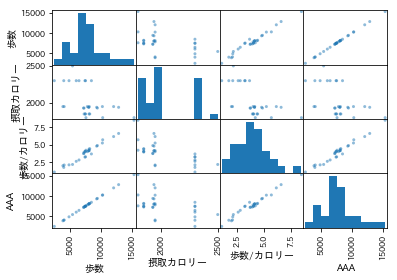

In [24]:
_  = scatter_matrix(df)

### データ変換「DataFrame」　→「Numpyの行列」

In [25]:
# DataFrameデータ
df.loc[:,["歩数","摂取カロリー"]]

,歩数,摂取カロリー
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0
2017-04-06,7593,1800.0
2017-04-07,9320,1940.0
2017-04-08,4873,2300.0
2017-04-09,12045,1950.0


In [26]:
# DataFrameデータを行列に変換
df.loc[:,["歩数","摂取カロリー"]].values

array([[ 5439.,  2500.],
       [ 2510.,  2300.],
       [10238.,  1950.],
       [ 8209.,  1850.],
       [ 9434.,  1930.],
       [ 7593.,  1800.],
       [ 9320.,  1940.],
       [ 4873.,  2300.],
       [12045.,  1950.],
       [ 7493.,  1850.],
       [ 7289.,  1930.],
       [ 6481.,  2300.],
       [10287.,  1800.],
       [ 8043.,  1940.],
       [ 7435.,  2300.],
       [ 7529.,  2300.],
       [ 8031.,  1940.],
       [ 8475.,  2300.],
       [ 8132.,  1950.],
       [15328.,  1800.],
       [12849.,  1940.],
       [ 4029.,  2300.],
       [ 3890.,  1950.],
       [ 8093.,  1850.],
       [ 7823.,  1950.],
       [ 7492.,  1850.],
       [ 7203.,  1930.],
       [ 7302.,  1850.],
       [ 6033.,  2300.],
       [ 4093.,  1950.]])